In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt



## Loading, exploring and preparing the dataset

In [2]:
#Loading the dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Explore the dataset. Find out the shape and the number of training examples
train_images.shape

(60000, 28, 28)

In [4]:
# Check how the labels look
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

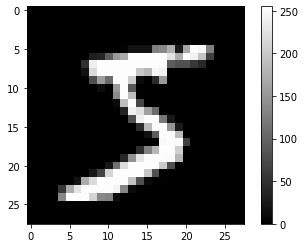

In [5]:
#Plot an example image
#Check how one image looks
plt.figure()
plt.imshow(train_images[0], cmap="gray")
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
#Normalize
train_images = train_images/ 255.0
test_images = test_images / 255.0

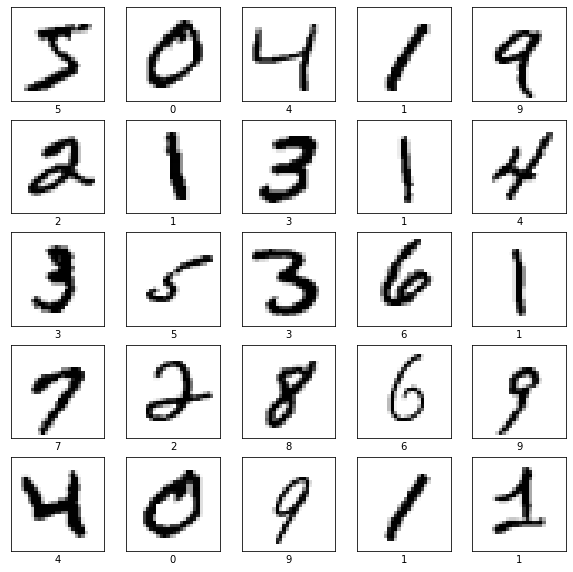

In [7]:
#Plot the results
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## A DNN

In [8]:
# Create a CNN network
def get_dnn_model():
    model = keras.Sequential([
       
        keras.layers.Flatten(input_shape=(28,28)), #Always use input_shape in your first layer (Makes debugging easier)
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax'),
    ])
    return model

dnn_model = get_dnn_model()


In [9]:
#Compile
dnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) #Can add more (or custom) e.g.: MSE
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = dnn_model.fit(train_images, train_labels, batch_size=32, epochs=5) # We get the history back

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2556 - accuracy: 0.9276
Epoch 2/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.1117 - accuracy: 0.9668
Epoch 3/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0771 - accuracy: 0.9769
Epoch 4/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0585 - accuracy: 0.9819
Epoch 5/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0455 - accuracy: 0.9855


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

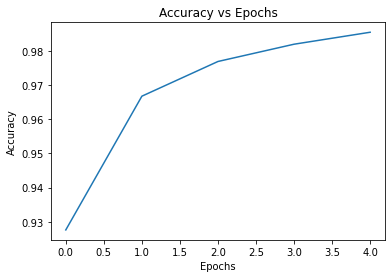

In [13]:
#Plot the history with the help of pandas
import pandas as pd
frame = pd.DataFrame(history.history)
acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

In [14]:
#Check the test accuracy
test_loss, test_acc = dnn_model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.0701 - accuracy: 0.9791

Test accuracy: 0.9791


## CNN model

In [15]:
# Create a CNN network
def get_cnn_model():
    model = keras.Sequential([
        keras.layers.Conv2D(kernel_size=3, filters=2, input_shape=(28, 28, 1), activation="relu", data_format="channels_last"), #Make sure the data format is correct
        keras.layers.Flatten(), #Always use input_shape in your first layer (Makes debugging easier)
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax'),
    ])
    return model

cnn_model = get_cnn_model()
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 2)         20        
_________________________________________________________________
flatten_1 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               173184    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 174,494
Trainable params: 174,494
Non-trainable params: 0
_________________________________________________________________


In [16]:
cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) #Can add more (or custom) e.g.: MSE

In [17]:
# Need to make sure the input is in the right form
train_images_with_channel = train_images[:,:,:, np.newaxis]
test_images_with_channel = test_images[:,:,:,  np.newaxis]

In [18]:
history = cnn_model.fit(train_images_with_channel, train_labels, batch_size=32, epochs=5) # We get the history back

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2167 - accuracy: 0.9356
Epoch 2/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0865 - accuracy: 0.9736
Epoch 3/5
60000/60000 [==============================] - 2s 42us/sample - loss: 0.0578 - accuracy: 0.9815
Epoch 4/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0410 - accuracy: 0.9870
Epoch 5/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0292 - accuracy: 0.9905


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

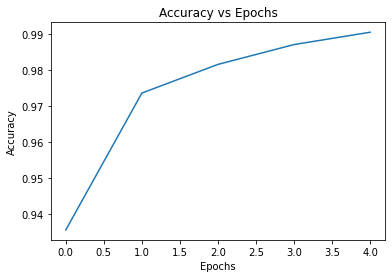

In [19]:
#Plot the history with the help of pandas
import pandas as pd
frame = pd.DataFrame(history.history)
acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

In [20]:
#Check the test accuracy
test_loss, test_acc = cnn_model.evaluate(test_images_with_channel,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.0777 - accuracy: 0.9769

Test accuracy: 0.9769


In [21]:
predictions = cnn_model.predict(test_images_with_channel)
print(np.argmax(predictions[0]))
test_labels[0]

7


7